In [1]:
import torch
from model import Model
from plot_utils import plot_forward, plot_dataset, plot_color_distribution, generate_forward, animate
from notebook_utils import Args
from dataset import prepare_data
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
import seaborn as sns


In [2]:
args = Args(timesteps=100, batch=4, unet_version=0, scale_down=True)
device = "cuda:0" if torch.cuda.is_available () else 'cpu'

In [3]:
train_dataloader, dataset = prepare_data (args.dataset_path, args.batch,resize=args.scale_down, return_dataset=True)
model = Model (None, args.timesteps)

### Dataset and Augmentations

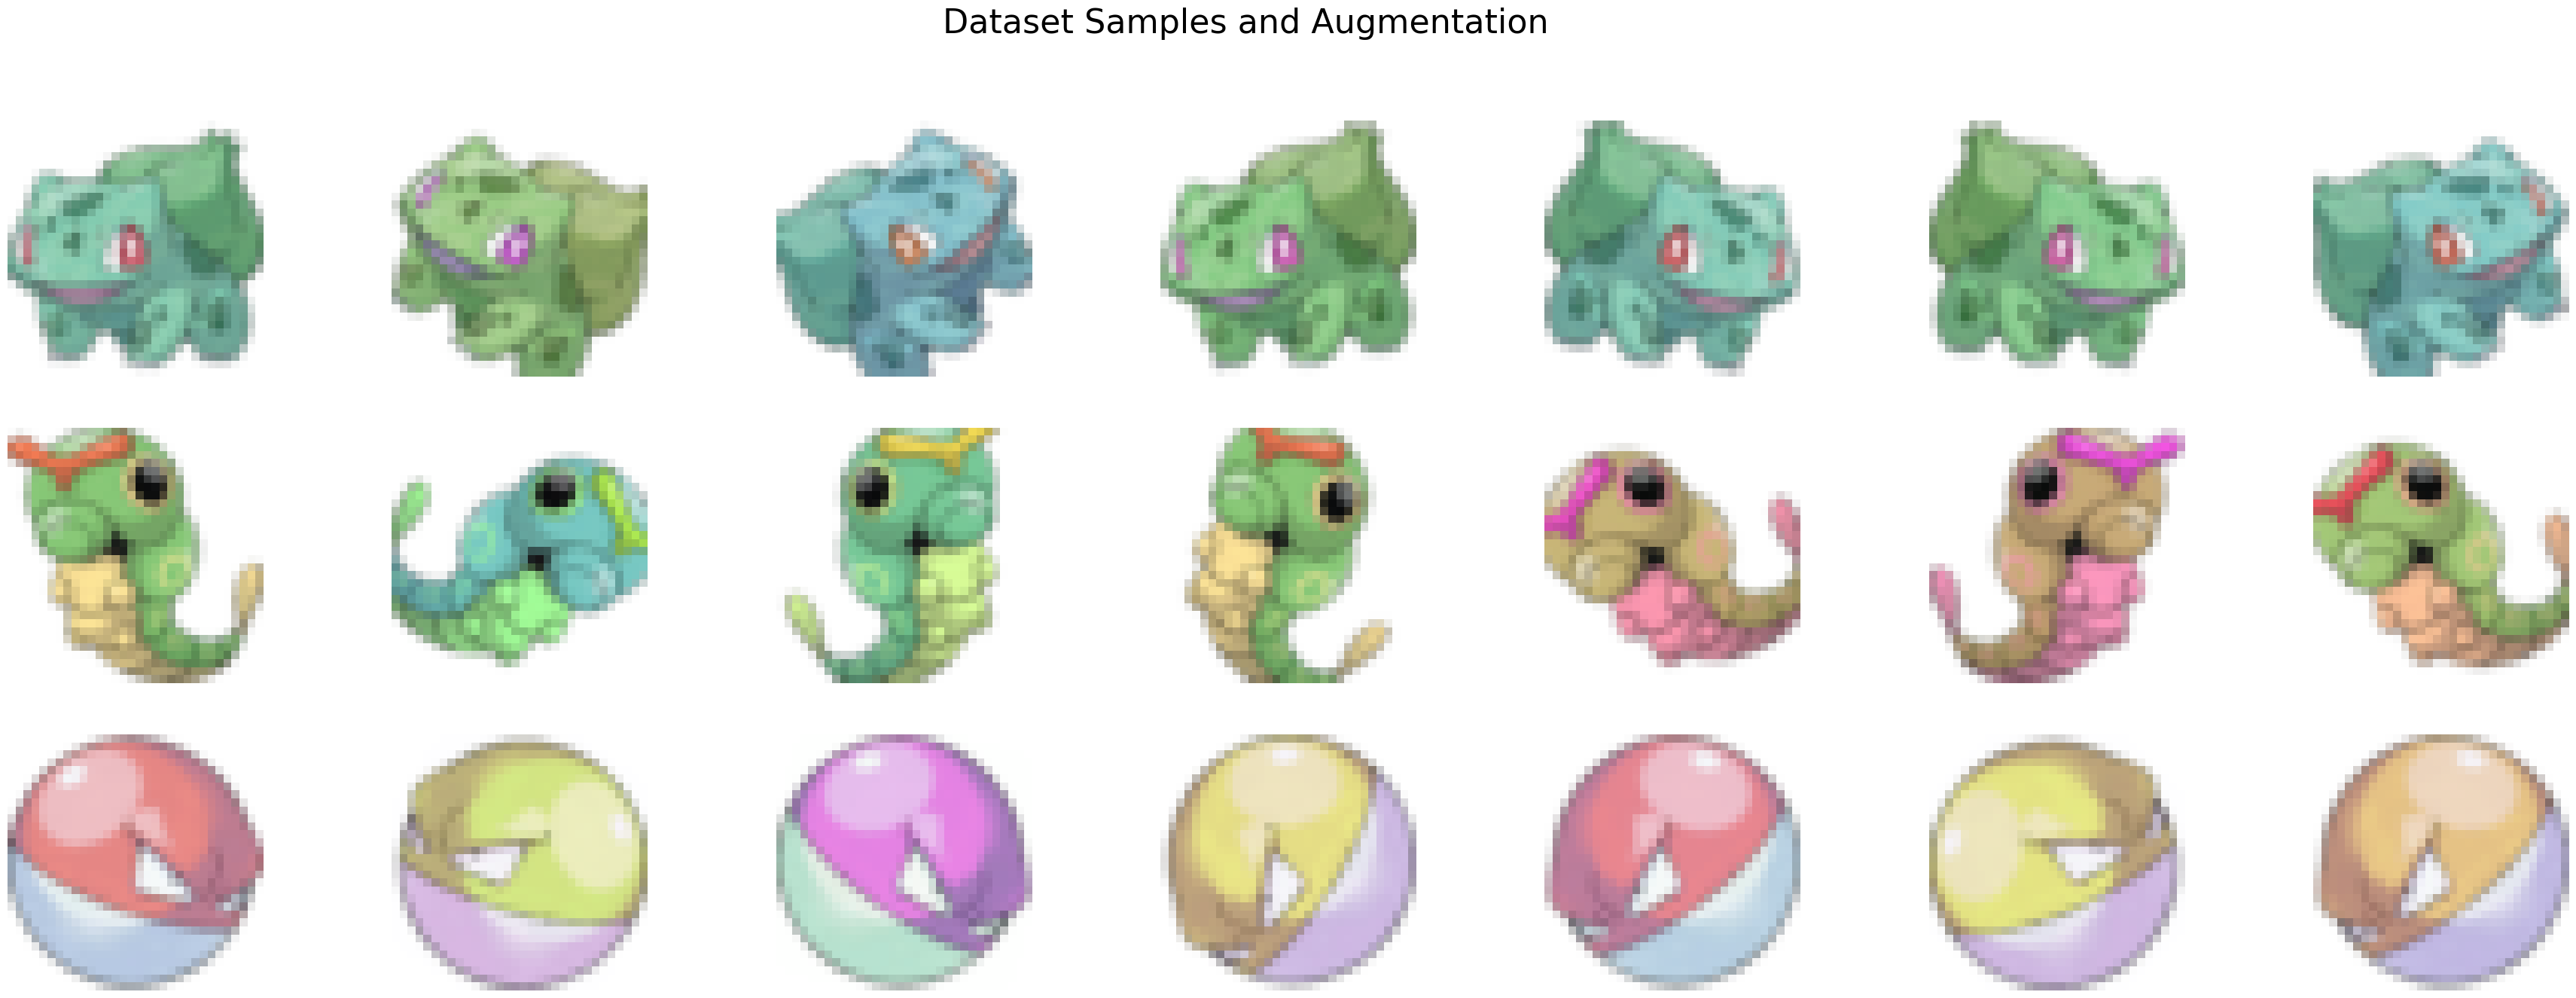

In [4]:
plot_dataset(dataset)

### The forward process

To generate noised versions of the input, we have used the closed-form formula (function "forward sample" in the model class) that allows to do the necessary calculations based on the noise schedule. 

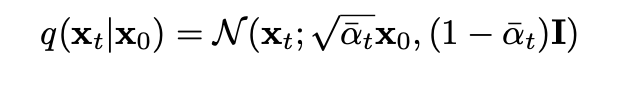

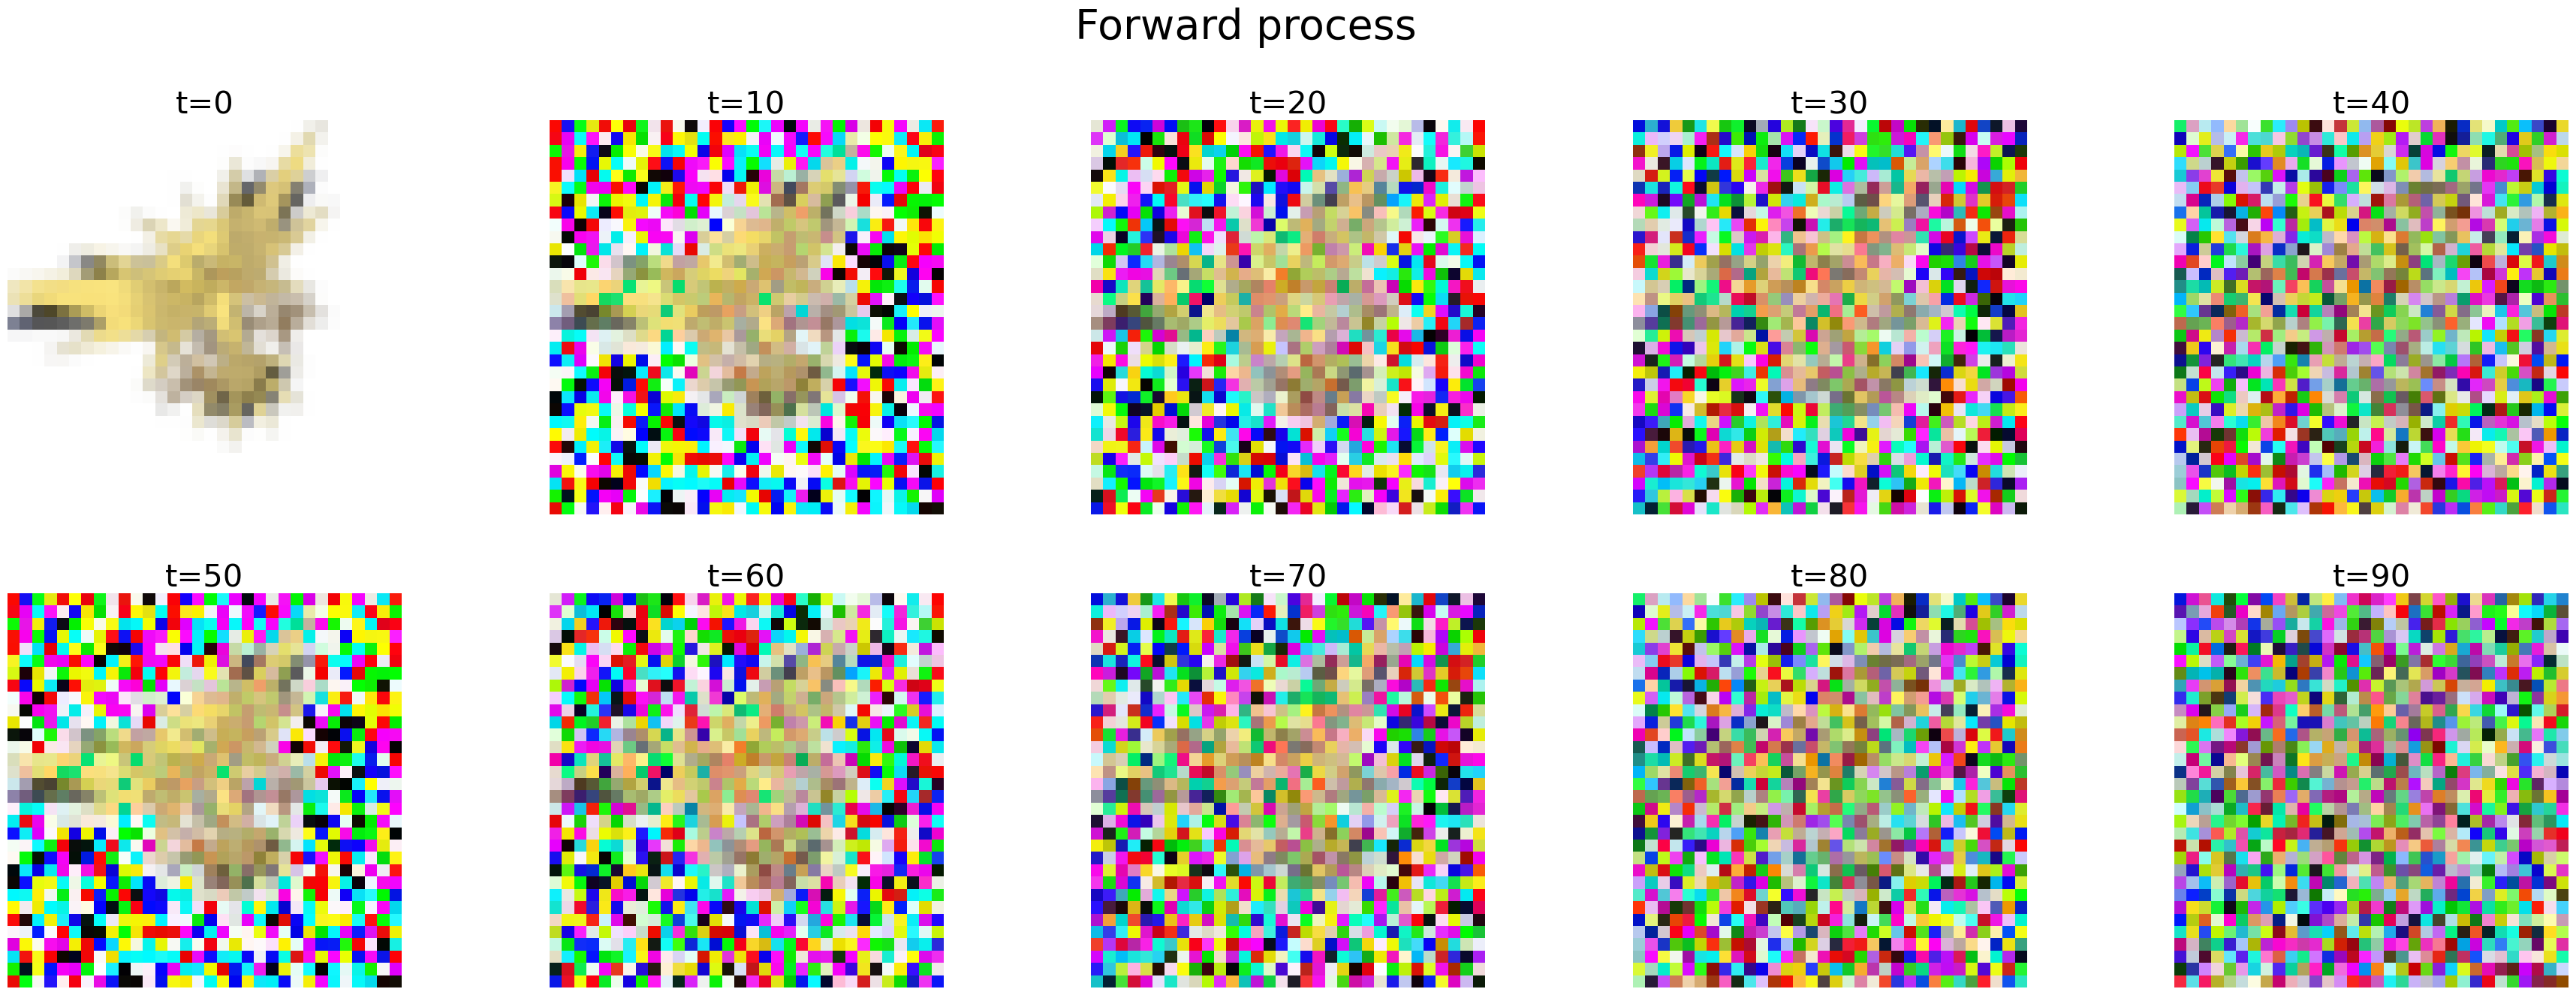

In [5]:
timesteps = torch.linspace (10, 90, 9).long ()
forward = generate_forward(model, train_dataloader,timesteps)
plot_forward(forward)

In [6]:
timesteps = torch.arange(100).long ()
forward = generate_forward(model, train_dataloader,timesteps)
animate(forward)

![SegmentLocal](forward_animate.gif "segment")

### Training

We let the network predict the noise and calculated the loss based on the difference between the predicted noise and the actual noise at a specfific timestep (function "train step" in the model class):

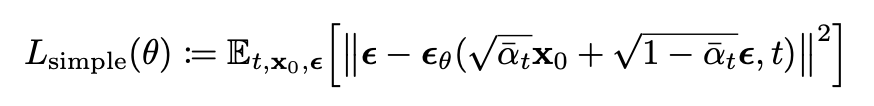

### Sampling

Sampling is done via the "backward sample" and "inference loop" functions in the model class and implements the following algorithm:

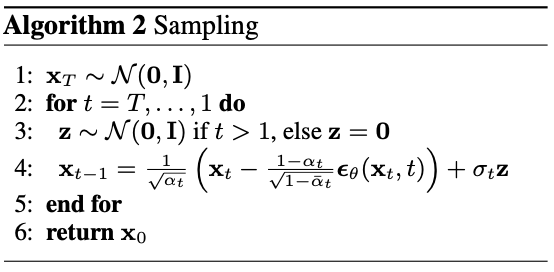

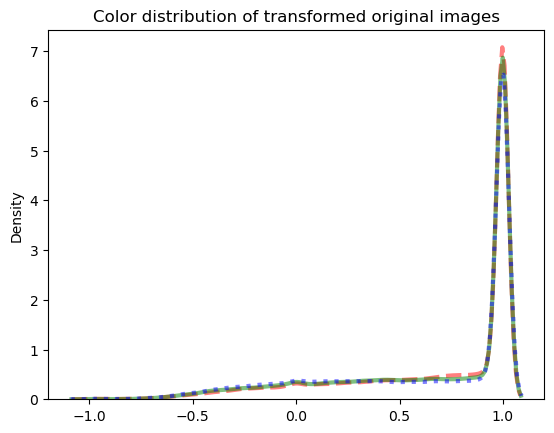

In [7]:
plot_color_distribution(args, model, dataset, train_dataloader,device, forward=False)

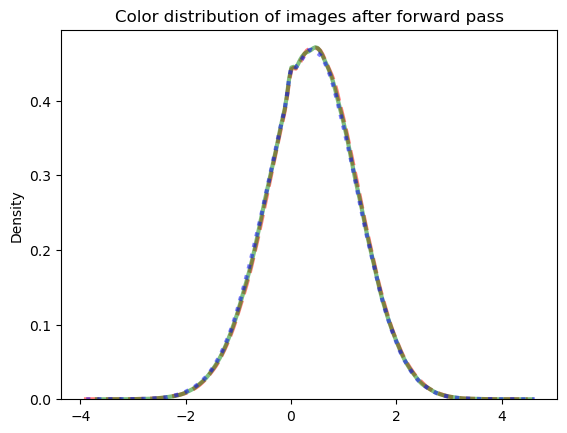

In [8]:
plot_color_distribution(args, model, dataset, train_dataloader,device, forward=True)

### U-Net

We have tested 4 types pf UNets:-

1. A simple U-Net with positional time embeddings. (V1)
2. A U-Net with Attention and posiitonal time embeddings. (V2)
3. A U-Net with ResNet encoders (convolutions, group normalization and Silu-activation) and attention. (V3)
4. A U-Net with ResNet encoders (convolutions, batch normalization and ReLu activation) and attention. (V3)

The best sampling sampling results were achieved with a model that uses a simple U-Net.